In [17]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # use this plot style
import sys
%matplotlib inline
# inline表示将图表嵌入到Notebook中
%magic

In [18]:
# generate 100 random samples
train_x = np.random.rand(100).astype(np.float)
# compute train_y
train_y = 0.2*train_x + 5
#test data
test_x = np.random.rand(100).astype(np.float32)

df = pd.DataFrame({
    'x':train_x,
    'y':train_y
})

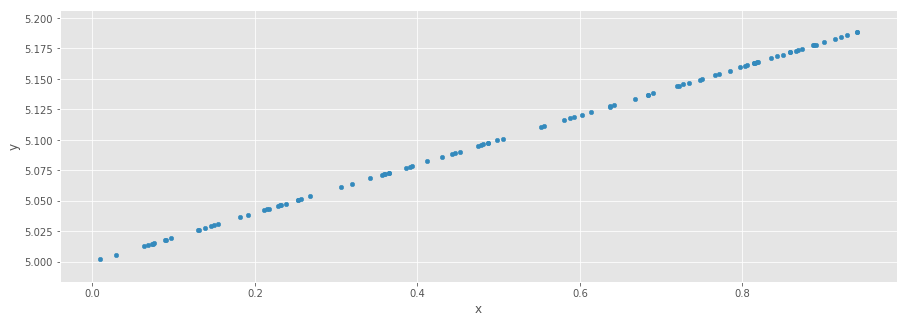

In [19]:
df.plot.scatter(x='x',y='y',figsize=(15,5))

In [20]:
# placeholders
x = tf.placeholder(tf.float32,name='01_x')
y = tf.placeholder(tf.float32,name='01_y')

# variables
# Note that np.random.rand() is used to initialize your variables
# np.random.rand() 作用是初始化
W = tf.Variable(np.random.rand())
b = tf.Variable(np.random.rand())
pred = tf.multiply(W,x) + b

# minimize the mean square errors
# as mentioned above there are other ways to measure the error between train_y and pred
loss = tf.reduce_mean(tf.square(pred-y))

# we pick out our optimizer and a learning rate
optimizer = tf.train.GradientDescentOptimizer(0.7)

# we train our model by minimize our loss function
train = optimizer.minimize(loss)

In [21]:
# init the variables
init = tf.global_variables_initializer()

# run your graph
with tf.Session() as sess:
    sess.run(init)
    
    #fit the function
    for step in range(200):
        #get your data
        train_data = {x:train_x, y:train_y}
        
        sess.run(train,feed_dict=train_data)
        
        if step%10 == 0:
            print(step,sess.run(W),sess.run(b))
            
    # note that W and b match the line we are tying to model (y = w*x + b)
    print("Train complete,W =",sess.run(W)," b =",sess.run(b))
    
    #run your trained model on your test data
    test_result = sess.run(pred,feed_dict={x:test_x})
    
    df_final = pd.DataFrame({'test_x':test_x,'pred':test_result})


0 3.5108979 6.89035
10 1.0499027 4.881465
20 0.49612316 4.8708982
30 0.31451094 4.940669
40 0.24549632 4.9755197
50 0.21819359 4.990125
60 0.20728645 4.996037
70 0.20291924 4.9984117
80 0.2011698 4.9993634
90 0.20046858 4.999745
100 0.200188 4.9998975
110 0.20007518 4.999959
120 0.20003 4.9999833
130 0.20001207 4.9999933
140 0.20000482 4.999997
150 0.20000184 4.9999986
160 0.20000094 4.9999995
170 0.20000069 4.9999995
180 0.20000069 4.9999995
190 0.20000069 4.9999995
Train complete,W = 0.20000069  b = 4.9999995


Text(0.5,0,'x')

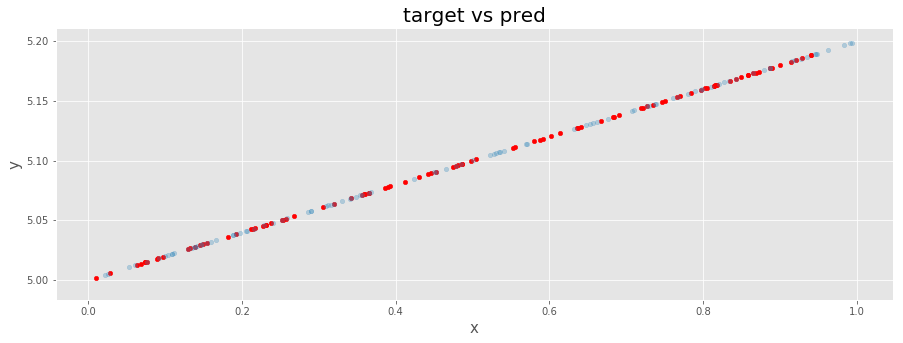

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))

# chart 1: show the line we are trying to model
df.plot.scatter(x='x',y='y',color='red',ax=axes)

# chart 2: show the line we trained model came up with
# alpha表示透明度
df_final.plot.scatter(x='test_x',y='pred',ax=axes, alpha=0.3)

# add a litter sugar
axes.set_title('target vs pred',fontsize=20)
axes.set_ylabel('y',fontsize=15)
axes.set_xlabel('x',fontsize=15)